# Paper Experiment and Evaluation

# NO LOAD

In [88]:
%matplotlib inline
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

# constant values

BLUE='#215fa7'
LBLUE= '#51b7c5'
GREEN= '#a0dab3'
YELLOW='#fffecc'


def mean(data):
    return statistics.mean(data)

def med(data):
    return statistics.median(data)

def count(data):
    return data.count()

def find_percentage_gain(hdf, ldfk):
    high=statistics.median(hdf)
    low=statistics.median(ldfk)
    return ((high-low)/high)*100


def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('BuGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

def generate_graph(results, category_names=[ 'Frankfurt', 'Ireland'],):
    survey(results, category_names)


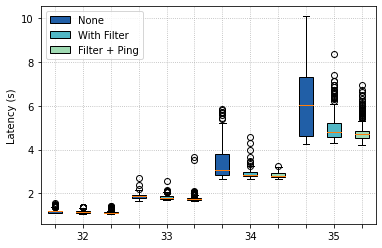

In [89]:

df31k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-119-T5-N31-F0/2-node.csv", skiprows=0, ).iloc[:,2]
df31k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-120-T5-N31-F1/2-node.csv", skiprows=100,).iloc[:,2]

df32k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-115-T5-N32-F0/2-node.csv", skiprows=100, ).iloc[:,2]
df32k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-164-T5-N32-F1-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df32k1p1t5 = pd.read_csv("AWSTests/CPU-KF-PING/Exp-140-T5-N32-F1-P1/2-node.csv", skiprows=100, nrows=300).iloc[:,2]


df33k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-163-T5-N33-F0-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df33k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-112-T5-N33-F1/2-node.csv", skiprows=100,).iloc[:,2]
df33k1p1t5 = pd.read_csv("AWSTests/CPU-KF-PING/Exp-137-T5-N33-F1-P1/2-node.csv", skiprows=100, nrows=300).iloc[:,2]


df34k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-113-T5-N34-F0/2-node.csv", skiprows=100, ).iloc[:,2]
df34k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-114-T5-N34-F1/2-node.csv", skiprows=100, ).iloc[:,2]
df34k1p1t5 = pd.read_csv("AWSTests/CPU-KF-PING/Exp-134-T5-N34-F1-P1/2-node.csv", skiprows=100, nrows=300).iloc[:,2]


df35k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-118-T5-N35-F0/2-node.csv", skiprows=100, ).iloc[:,2]
df35k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-117-T5-N35-F1/2-node.csv", skiprows=100, ).iloc[:,2]
df35k1p1t5 = pd.read_csv("AWSTests/CPU-KF-PING/Exp-128-T5-N35-F1-P1/2-node.csv", skiprows=100, nrows=300).iloc[:,2]

dfLoad0Mean=[
    df31k0p0t5.mean(axis = 0)-df31k1p0t5.mean(axis = 0),
    df32k0p0t5.mean(axis = 0)-df32k1p0t5.mean(axis = 0),
    df33k0p0t5.mean(axis = 0)-df33k1p0t5.mean(axis = 0),
    df34k0p0t5.mean(axis = 0)-df34k1p0t5.mean(axis = 0),
    df35k0p0t5.mean(axis = 0)-df35k1p0t5.mean(axis = 0)]



data=[df32k0p0t5 ,df32k1p0t5 ,df32k1p1t5, df33k0p0t5 ,df33k1p0t5 ,df33k1p1t5 ,df34k0p0t5 ,df34k1p0t5 ,df34k1p1t5,
      df35k0p0t5 ,df35k1p0t5 ,df35k1p1t5]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Latency (s)')
#ax1.set_title('latency Plot', y=-10.01)
box1= ax1.boxplot(data, positions=[1,2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12], notch=False, patch_artist=True)
for idx, box in enumerate(box1['boxes']):
   # box.showfliers=False

    if idx % 3 == 0:
        box.set(facecolor = BLUE )
    elif idx % 3 == 1:
        box.set(facecolor = LBLUE )
    else:
        box.set(facecolor = GREEN )
    
ax1.grid(True, linestyle='dotted')
ax1.legend([box1["boxes"][0], box1["boxes"][1], box1["boxes"][2]], ['None', 'With Filter','Filter + Ping'], loc='upper left')

plt.xticks([1, 2, 3, 4, 5, 6,7,8, 9, 10, 11, 12], [' ','32', '','','33', '',' ','34', '','','35', ''])
plt.show()

# TODO: Remove 36 DONE

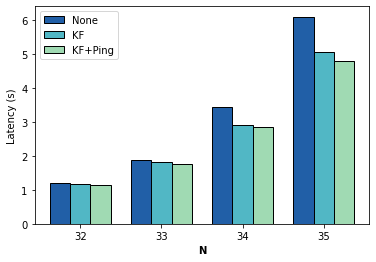

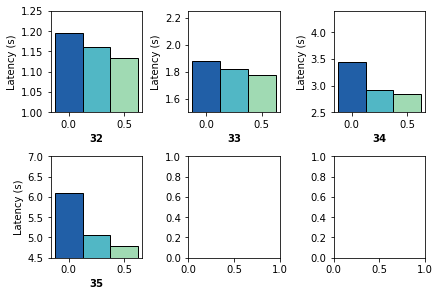

In [90]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [mean(df32k0p0t5), mean(df33k0p0t5), mean(df34k0p0t5), mean(df35k0p0t5)]
bars2 = [mean(df32k1p0t5), mean(df33k1p0t5), mean(df34k1p0t5), mean(df35k1p0t5),]
bars3 = [mean(df32k1p1t5), mean(df33k1p1t5), mean(df34k1p1t5), mean(df35k1p1t5),]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots()
 
    
# Make the plot
plt.bar(r1, bars1, color=BLUE, width=barWidth, edgecolor='black', label='None')
plt.bar(r2, bars2, color=LBLUE, width=barWidth, edgecolor='black', label='KF')
plt.bar(r3, bars3, color=GREEN, width=barWidth, edgecolor='black', label='KF+Ping')
 
# Add xticks on the middle of the group bars
plt.xlabel('N', fontweight='bold')
#plt.ylim([1.1, 1.5])
plt.ylabel('Latency (s)')
plt.xticks([r + barWidth for r in range(len(bars1))], ['32', '33', '34', '35'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

def do_plot(ax, data, n, lot, upt):
    
    
    # set width of bars
    barWidth = 0.25

    # set heights of bars
    bars1 = [data[0]]

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    ax.bar(r1, [data[0]], color=BLUE, width=barWidth, edgecolor='black', label='None')
    ax.bar(r2, [data[1]], color=LBLUE, width=barWidth, edgecolor='black', label='KF')
    ax.bar(r3, [data[2]], color=GREEN, width=barWidth, edgecolor='black', label='KF+Ping')

    # Add xticks on the middle of the group bars
    #ax.xlabel('n', fontweight='bold')
    ax.set_ylim(lot,upt)
    ax.set_ylabel('Latency (s)')
    ax.set_xlabel(n, fontweight='bold')
    #ax.set_xticks([r + barWidth for r in range(len(bars1))], minor=False)


fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(ncols=3, nrows=2, constrained_layout=True)
#fig.tight_layout() 

do_plot(ax1, [mean(df32k0p0t5),mean(df32k1p0t5), mean(df32k1p1t5)], 32, 1.0,1.25)
do_plot(ax2, [mean(df33k0p0t5),mean(df33k1p0t5), mean(df33k1p1t5)], 33, 1.5,2.25)
do_plot(ax3, [mean(df34k0p0t5),mean(df34k1p0t5), mean(df34k1p1t5)], 34, 2.5,4.40)
do_plot(ax4, [mean(df35k0p0t5),mean(df35k1p0t5), mean(df35k1p1t5)], 35, 4.5,7.00)
#do_plot(ax5, [mean(df36k0p0t5),mean(df36k1p0t5), mean(df36k1p1t5)], 36, 10.0,12.00)

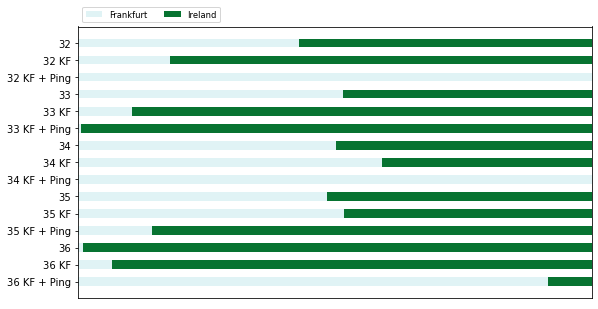

In [91]:
results = {
    '32': [0.43058823529411766,0.5694117647058824],
    '32 KF': [0.17857142857142858,0.8214285714285714],
    '32 KF + Ping': [1.0,0],
    '33': [0.5158924205378973,0.4841075794621027],
    '33 KF': [0.1036036036036036,0.8963963963963963],
    '33 KF + Ping': [0.004796163069544364,0.9952038369304557],
    '34': [0.5011933174224343,0.4988066825775656],
    '34 KF': [0.5910064239828694,0.4089935760171306],
    '34 KF + Ping': [1.0,0],
    '35': [0.48470588235294115,0.5152941176470588],
    '35 KF': [0.5170212765957447,0.4829787234042553],
    '35 KF + Ping': [0.14285714285714285,0.8571428571428571],
    '36': [0.01,0.99],
    '36 KF': [0.06569343065693431,0.9343065693430657],
    '36 KF + Ping': [0.9143518518518519,0.08564814814814815]
}


generate_graph(results)

# Load 25%

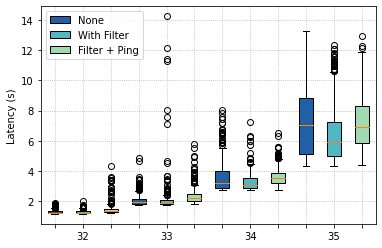

In [92]:
df35k0p0t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-145-T5-N35-F0-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df35k1p0t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-144-T5-N35-F1-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df35k1p1t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-143-T5-N35-F1-P1/2-node.csv", skiprows=100, ).iloc[:,2]

df34k0p0t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-148-T5-N34-F0-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df34k1p0t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-149-T5-N34-F1-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df34k1p1t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-152-T5-N34-F1-P1/2-node.csv", skiprows=100, ).iloc[:,2]

df33k0p0t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-153-T5-N33-F0-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df33k1p0t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-155-T5-N33-F1-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df33k1p1t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-156-T5-N33-F1-P1/2-node.csv", skiprows=100, ).iloc[:,2]

df32k0p0t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-157-T5-N32-F0-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df32k1p0t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-158-T5-N32-F1-P0/2-node.csv", skiprows=100, ).iloc[:,2]
df32k1p1t5 = pd.read_csv("AWSTests/CPU-KF-PING-25/Exp-161-T5-N32-F1-P1/2-node.csv", skiprows=100, ).iloc[:,2]


data=[df32k0p0t5, df32k1p0t5, df32k1p1t5, df33k0p0t5, df33k1p0t5, df33k1p1t5 , df34k0p0t5, df34k1p0t5, df34k1p1t5, df35k0p0t5 ,df35k1p0t5 ,df35k1p1t5]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Latency (s)')
box1= ax1.boxplot(data, positions=[1,2,3, 4, 5, 6, 7, 8 , 9 , 10, 11, 12], notch=False, patch_artist=True)
for idx, box in enumerate(box1['boxes']):
    if idx % 3 == 0:
        box.set(facecolor = BLUE )
    elif idx % 3 == 1:
        box.set(facecolor = LBLUE )
    else:
        box.set(facecolor = GREEN )
ax1.grid(True, linestyle='dotted')

ax1.legend([box1["boxes"][0], box1["boxes"][1], box1["boxes"][2]], ['None', 'With Filter','Filter + Ping'], loc='upper left')

plt.xticks([1, 2, 3, 4, 5, 6,7,8, 9, 10, 11, 12], [' ','32', '','','33', '',' ','34', '','','35',''])
plt.show()


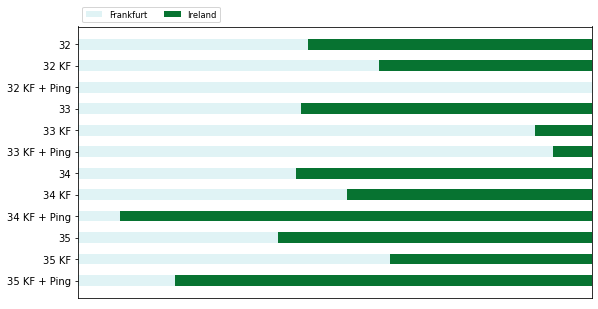

In [93]:
results = {
    '32': [0.44801980198019803,0.551980198019802],
    '32 KF': [0.5855130784708249,0.41448692152917505],
    '32 KF + Ping': [1.0,0],
    '33': [ 0.4345679012345679,0.5654320987654321],
    '33 KF': [0.8901869158878505,0.10981308411214953],
    '33 KF + Ping': [0.9243027888446215,0.07569721115537849],
    '34': [0.4231678486997636,0.5768321513002365],
    '34 KF': [0.523696682464455,0.476303317535545],
    '34 KF + Ping': [0.08045977011494253,0.9195402298850575],
    '35': [0.38902743142144636,0.6109725685785536],
    '35 KF': [0.6069651741293532,0.39303482587064675],
    '35 KF + Ping': [0.18858560794044665,0.8114143920595533],
}

generate_graph(results)


## LOAD 30 

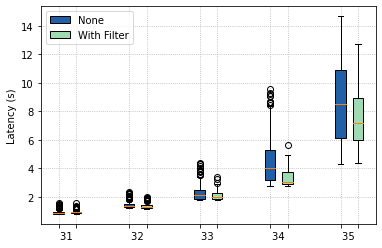

,n-KF,Mean,Median
0,31,0.908551,0.860537
1,31 KF,0.906476,0.895550
2,32,1.405198,1.336677
3,32 KF,1.332084,1.273587
4,33,2.235363,2.085828
5,33 KF,2.064540,2.009676
6,34,4.491229,4.004874
7,34 KF,3.287395,3.026921
8,35,8.560366,8.545603
9,35 KF,7.609348,7.212064


In [94]:
df31k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-201-T5-N31-F0-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]
df31k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-202-T5-N31-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]

df32k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-188-T5-N32-F0-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]
df32k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-203-T5-N32-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]

df33k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-191-T5-N33-F0-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]
df33k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-192-T5-N33-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]

df34k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-200-T5-N34-F0-P0/2-node.csv", skiprows=100, nrows=400).iloc[:,2]
df34k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-197-T5-N34-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]

df35k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-195-T5-N35-F0-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]
df35k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-196-T5-N35-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]


dfLoad30Mean=[
    df31k0p0t5.mean(axis = 0)-df31k1p0t5.mean(axis = 0),
    df32k0p0t5.mean(axis = 0)-df32k1p0t5.mean(axis = 0),
    df33k0p0t5.mean(axis = 0)-df33k1p0t5.mean(axis = 0),
    df34k0p0t5.mean(axis = 0)-df34k1p0t5.mean(axis = 0),
    df35k0p0t5.mean(axis = 0)-df35k1p0t5.mean(axis = 0)]

data=[df31k0p0t5, df31k1p0t5, 
      df32k0p0t5, df32k1p0t5, 
      df33k0p0t5, df33k1p0t5,
      df34k0p0t5, df34k1p0t5,
      df35k0p0t5, df35k1p0t5]
fig1, ax1 = plt.subplots()# figsize=(4, 3)
ax1.set_ylabel('Latency (s)')
box1= ax1.boxplot(data, positions=[1,1.5,3,3.5,5,5.5,7,7.5,9,9.5], notch=False, patch_artist=True,
                 widths = 0.3)
for idx, box in enumerate(box1['boxes']):
    if idx % 2 == 0:
        box.set(facecolor = BLUE )
    else:
        box.set(facecolor = GREEN )
ax1.grid(True, linestyle='dotted')

ax1.legend([box1["boxes"][0], box1["boxes"][1], box1["boxes"][2]], ['None', 'With Filter'], loc='upper left')

plt.xticks([1,1.5,3,3.5,5,5.5,7,7.5,9,9.5], [' ','31 ', ' ','32 ', ' ', '33 ',' ','34 ',' ','35 '], ha='right', rotation=0)
plt.show()

n_kf = ['31', '31 KF', '32', '32 KF', '33','33 KF', '34','34 KF', '35','35 KF']
frame = {
        'n-KF': pd.Series(n_kf), 
        'Mean': pd.Series([mean(x) for x in data ]), 
        'Median': pd.Series([med(x) for x in data ])  
        }
result = pd.DataFrame(frame)
display(result)

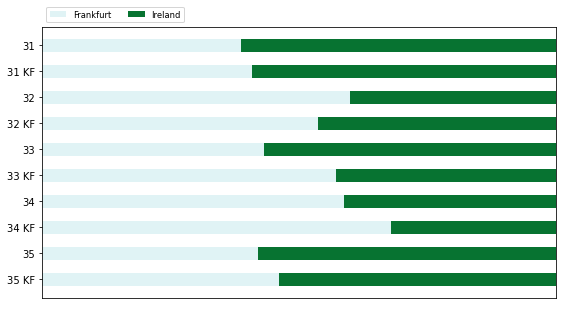

In [95]:
results = {
    '31': [0.3875,0.6125],
    '31 KF': [0.40931372549019607,0.5906862745098039],
    '32': [ 0.6,0.4],
    '32 KF': [0.5370370370370371,0.46296296296296297],
    '33': [0.4320388349514563,0.5679611650485437],
    '33 KF': [0.5714285714285714,0.42857142857142855],
    '34': [0.5880893300248139,0.4119106699751861],
    '34 KF': [0.6788321167883211,0.32116788321167883], 
    '35': [0.41935483870967744,0.5806451612903226],
    '35 KF': [0.46078431372549017,0.5392156862745098],
}
generate_graph(results)

## LOAD 50 

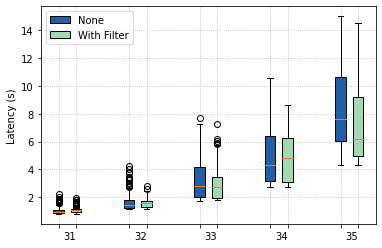

,n-KF,Mean,Median
0,31,1.007860,0.925337
1,31 KF,1.080471,1.045487
2,32,1.597922,1.452615
3,32 KF,1.581942,1.553332
4,33,3.272944,2.787273
5,33 KF,2.938425,2.755520
6,34,4.924595,4.299525
7,34 KF,4.880029,4.786757
8,35,8.528650,7.648074
9,35 KF,7.408978,6.178653


In [96]:
df31k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-204-T5-N31-F0-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]
df31k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-205-T5-N31-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]

df32k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-206-T5-N32-F0-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]
df32k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-207-T5-N32-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]

df33k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-208-T5-N33-F0-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]
df33k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-209-T5-N33-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]

df34k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-210-T5-N34-F0-P0/2-node.csv", skiprows=100, nrows=400).iloc[:,2]
df34k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-211-T5-N34-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]

df35k0p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-212-T5-N35-F0-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]
df35k1p0t5 = pd.read_csv("AWSTests/CPU-KF/Exp-215-T5-N35-F1-P0/2-node.csv", skiprows=100, nrows=500).iloc[:,2]

dfLoad50Mean=[
    df31k0p0t5.mean(axis = 0)-df31k1p0t5.mean(axis = 0),
    df32k0p0t5.mean(axis = 0)-df32k1p0t5.mean(axis = 0),
    df33k0p0t5.mean(axis = 0)-df33k1p0t5.mean(axis = 0),
    df34k0p0t5.mean(axis = 0)-df34k1p0t5.mean(axis = 0),
    df35k0p0t5.mean(axis = 0)-df35k1p0t5.mean(axis = 0)]
###########
n_kf = ['31', '31 KF', '32', '32 KF', '33','33 KF', '34','34 KF', '35','35 KF']
mean_raw_data=[df31k0p0t5, df31k1p0t5, 
      df32k0p0t5, df32k1p0t5, 
      df33k0p0t5, df33k1p0t5,
      df34k0p0t5, df34k1p0t5,
      df35k0p0t5, df35k1p0t5]

mean_cal_data= [mean(x) for x in mean_raw_data ]
median_cal_data= [med(x) for x in mean_raw_data ]

  
n_kf_series = pd.Series(n_kf)
mean_series = pd.Series(mean_cal_data)
median_series = pd.Series(median_cal_data)
  
frame = {
        'n-KF': pd.Series(n_kf), 
        'Mean': pd.Series(mean_cal_data), 
        'Median': pd.Series(median_cal_data)  
        }
  
result = pd.DataFrame(frame)
########



data=[df31k0p0t5, df31k1p0t5, 
      df32k0p0t5, df32k1p0t5, 
      df33k0p0t5, df33k1p0t5,
      df34k0p0t5, df34k1p0t5,
      df35k0p0t5, df35k1p0t5]
fig1, ax1 = plt.subplots()# figsize=(4, 3)
ax1.set_ylabel('Latency (s)')
box1= ax1.boxplot(data, positions=[1,1.5,3,3.5,5,5.5,7,7.5,9,9.5], notch=False, patch_artist=True,
                 widths = 0.3)
for idx, box in enumerate(box1['boxes']):
    if idx % 2 == 0:
        box.set(facecolor = BLUE )
    #elif idx % 3 == 1:
    #    box.set(facecolor = LBLUE )
    else:
        box.set(facecolor = GREEN )
ax1.grid(True, linestyle='dotted')

ax1.legend([box1["boxes"][0], box1["boxes"][1], box1["boxes"][2]], ['None', 'With Filter'], loc='upper left')

plt.xticks([1,1.5,3,3.5,5,5.5,7,7.5,9,9.5], [' ','31', ' ','32', ' ', '33',' ','34',' ','35'], ha='right', rotation=0)
plt.show()
display(result)

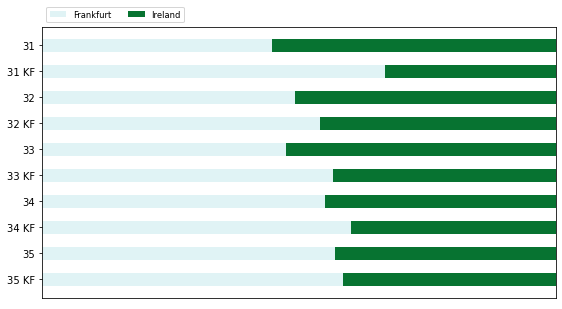

In [97]:
results = {
    '31': [0.44819277108433736,0.5518072289156627],
    '31 KF': [0.6682926829268293,0.33170731707317075],
    '32': [ 0.49292452830188677,0.5070754716981132],
    '32 KF': [0.541371158392435,0.458628841607565],
    '33': [0.4739454094292804,0.5260545905707196],
    '33 KF': [0.5669856459330144,0.43301435406698563],
    '34': [0.5503685503685504,0.44963144963144963],
    '34 KF': [0.6004962779156328,0.39950372208436724],
    '35': [0.5696821515892421,0.43031784841075793],
    '35 KF': [0.5866336633663366,0.41336633663366334],
}
generate_graph(results)


## Difference

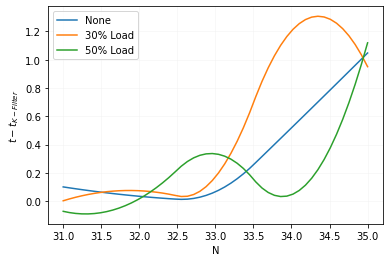

In [98]:
from scipy.interpolate import make_interp_spline, BSpline

df = pd.DataFrame({
    'None': dfLoad0Mean,
    '30': dfLoad30Mean,
    '50': dfLoad50Mean,
   }, index=[31, 32, 33, 34, 35])
#lines = df.plot.line(grid=True)
#create data
x = np.array([31, 32, 33, 34, 35])
y1 = np.array(dfLoad0Mean)
y2 = np.array(dfLoad30Mean)
y3 = np.array(dfLoad50Mean)

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(x.min(), x.max(), 50) 

#define spline with degree k=7
spl1 = make_interp_spline(x, y1, k=2)
y1_smooth = spl1(xnew)

spl2 = make_interp_spline(x, y2, k=2)
y2_smooth = spl2(xnew)

spl3 = make_interp_spline(x, y3, k=2)
y3_smooth = spl3(xnew)

#create smooth line chart 
plt.plot(xnew, y1_smooth, label='None')
plt.plot(xnew, y2_smooth, label='30% Load')
plt.plot(xnew, y3_smooth, label='50% Load')
plt.legend(loc='upper left')
plt.grid(axis='x', color='0.95', linewidth=0.5)
plt.grid(axis='y', color='0.95', linewidth=0.5)
plt.ylabel("$t-t_{KFilter}$")
plt.xlabel("N")
plt.show()